In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
### provide options to display full output rather than the last output in jupyter notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
card = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard.csv.zip")
display(card.head(3))

display(card.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


(284807, 31)

In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Check for missing data

In [ ]:
print(card.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Clean up duplicated data

In [ ]:
duplicated_rows = card.duplicated()
duplicated_items = card.loc[duplicated_rows]
duplicated_items.shape

(1081, 31)

In [ ]:
#Save a copy of original card before dropping duplicated rows just in case
card_ori = card.copy()
card_ori.shape

(284807, 31)

In [ ]:
#Drop duplicated items
card.drop_duplicates(subset=None, inplace=True)

In [ ]:
display(card_ori.shape)
display(card.shape)
display("Duplicated rows removed: ", (card_ori.shape[0] - card.shape[0]))

(284807, 31)

(283726, 31)

'Duplicated rows removed: '

1081

## check for labeled data imbalance

In [ ]:
card.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
print("No Fraud percentage in the dataset: ", round(card['Class'].value_counts()[0]/len(card) * 100, 2),'%')
print("Fraud percentage in the dataset: ", round(card['Class'].value_counts()[1]/len(card) * 100, 2),'%')

No Fraud percentage in the dataset:  99.83 %
Fraud percentage in the dataset:  0.17 %


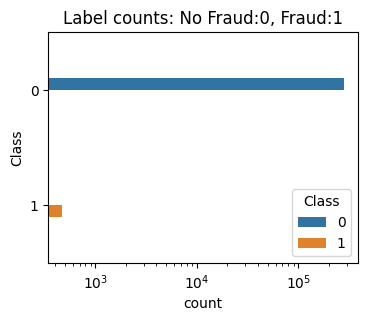

In [ ]:
#plot the log scale of label counts
plt.figure(figsize=(4,3))
ax = sns.countplot(data=card, y='Class',hue='Class',width=0.2)
ax.set_xscale('log')
plt.title("Label counts: No Fraud:0, Fraud:1")
plt.show()

## Exploratory Data Analysis (EDA)

Distribution of all the variables: plot all the variables for their distribution and see if there are any skewness in those features

In [ ]:
### check total column size
len(card.columns)

31

In [ ]:
### define how many rows and cols of plots you want to draw for the feature in dataframe
def plot_distribution(dataframe, features, rows=6, cols=6):
    fig=plt.figure(figsize=(18,15))
    for i , feature in enumerate(features):
        ax = fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=30, ax=ax, facecolor='salmon', alpha=0.8)
        ax.set_title("Distribution:" + feature, color='black')
        ax.set_yscale("log")
    fig.tight_layout()
    plt.show()

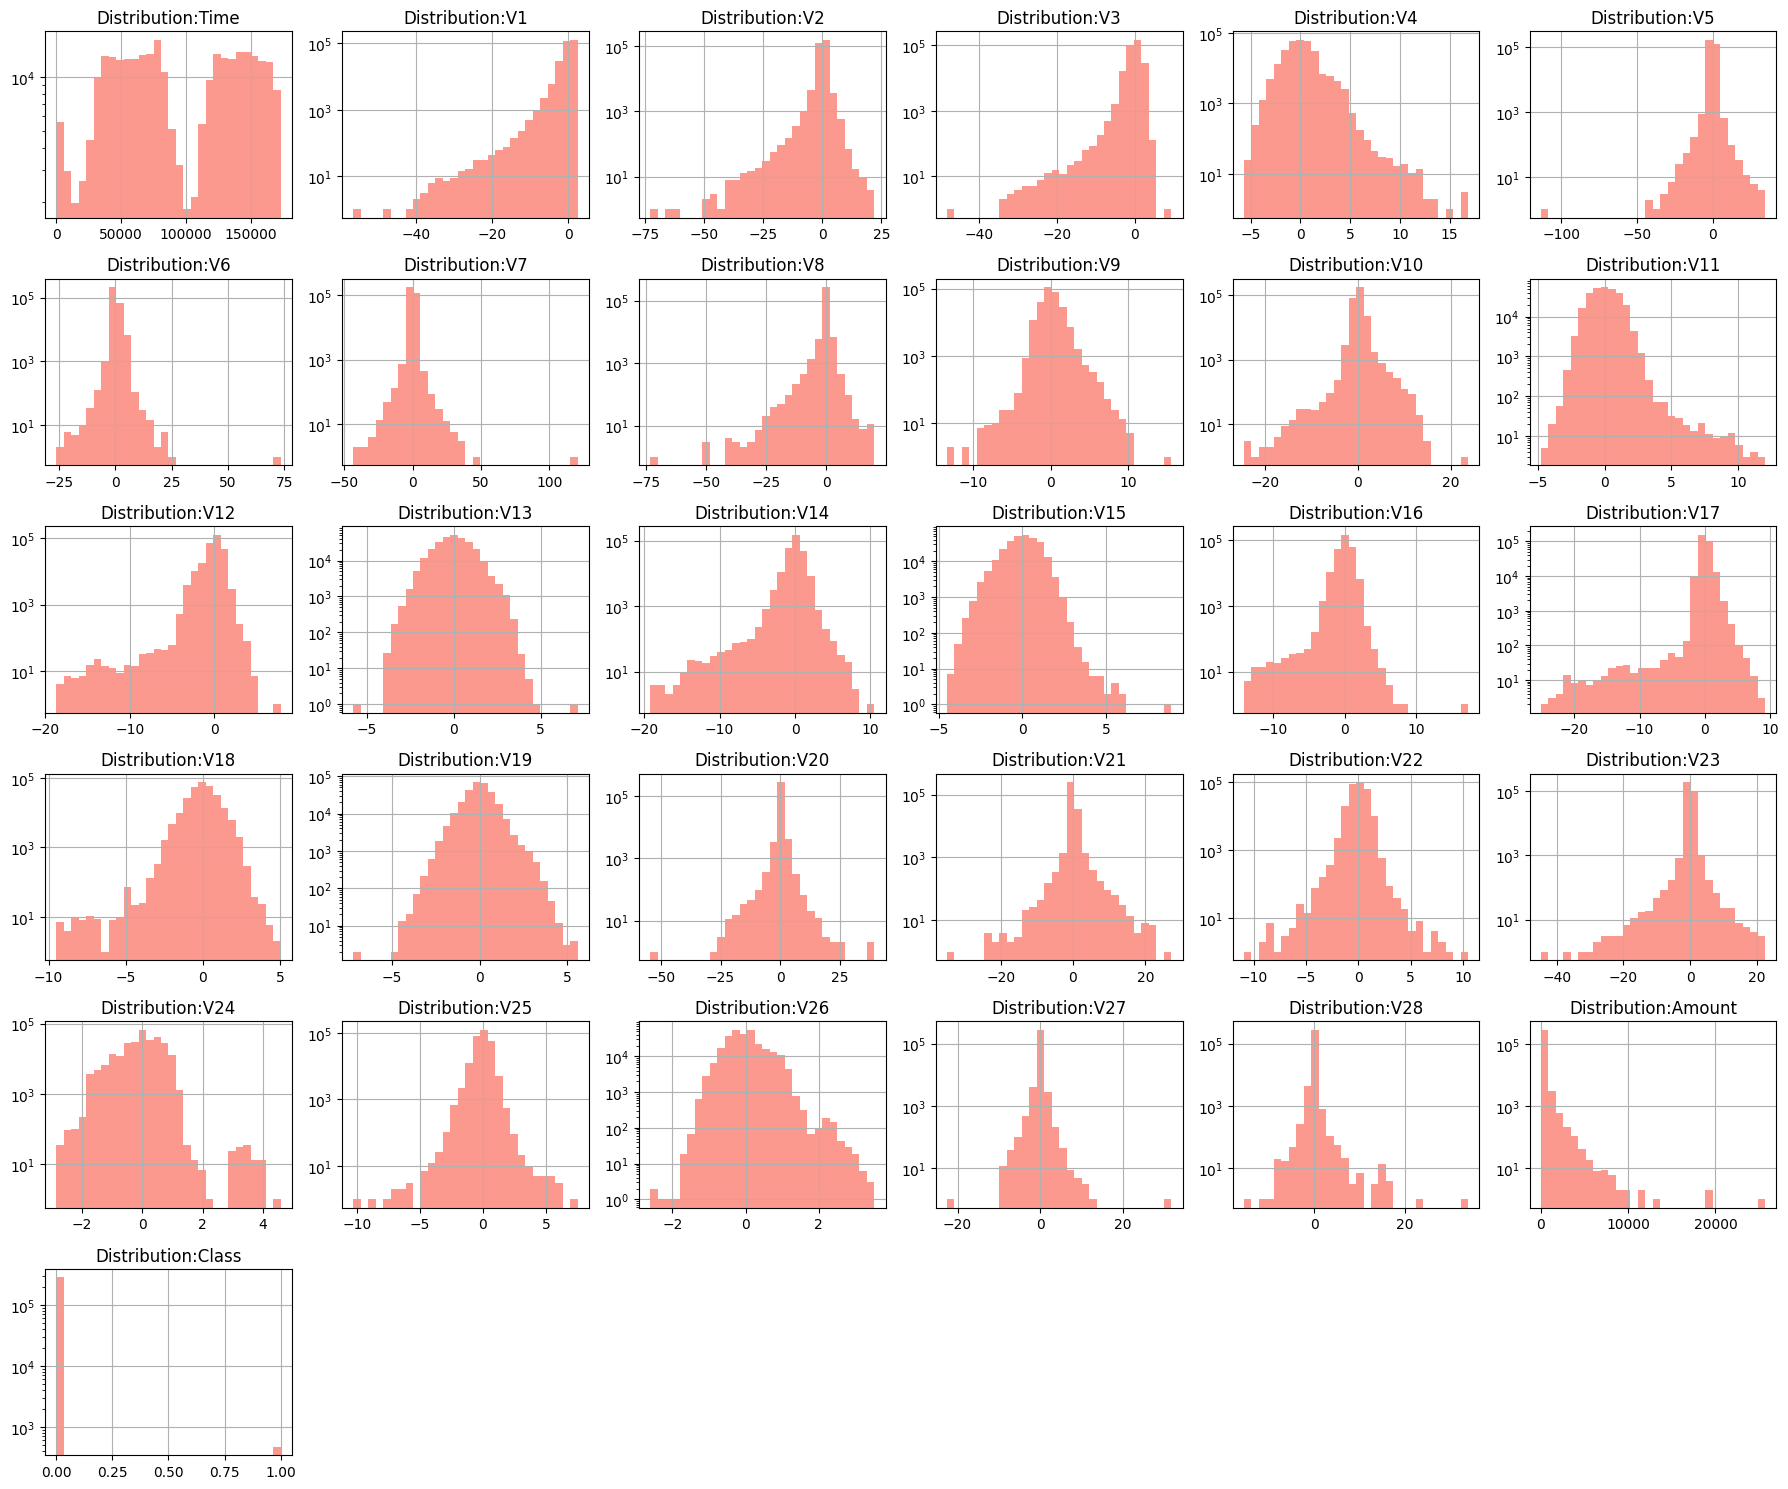

In [ ]:
plot_distribution(card, card.columns)

From the above histgram, it seems most features follows normal distribution except Time (bimodal), Amounts(right skewed) and Class (unbalanced)

## Correlations (between feature and Classes)
Display features that are highly positive or negatively correlated with 'Class', we can see from the correlation matrix, there are some features have higher correlations with labels than the others

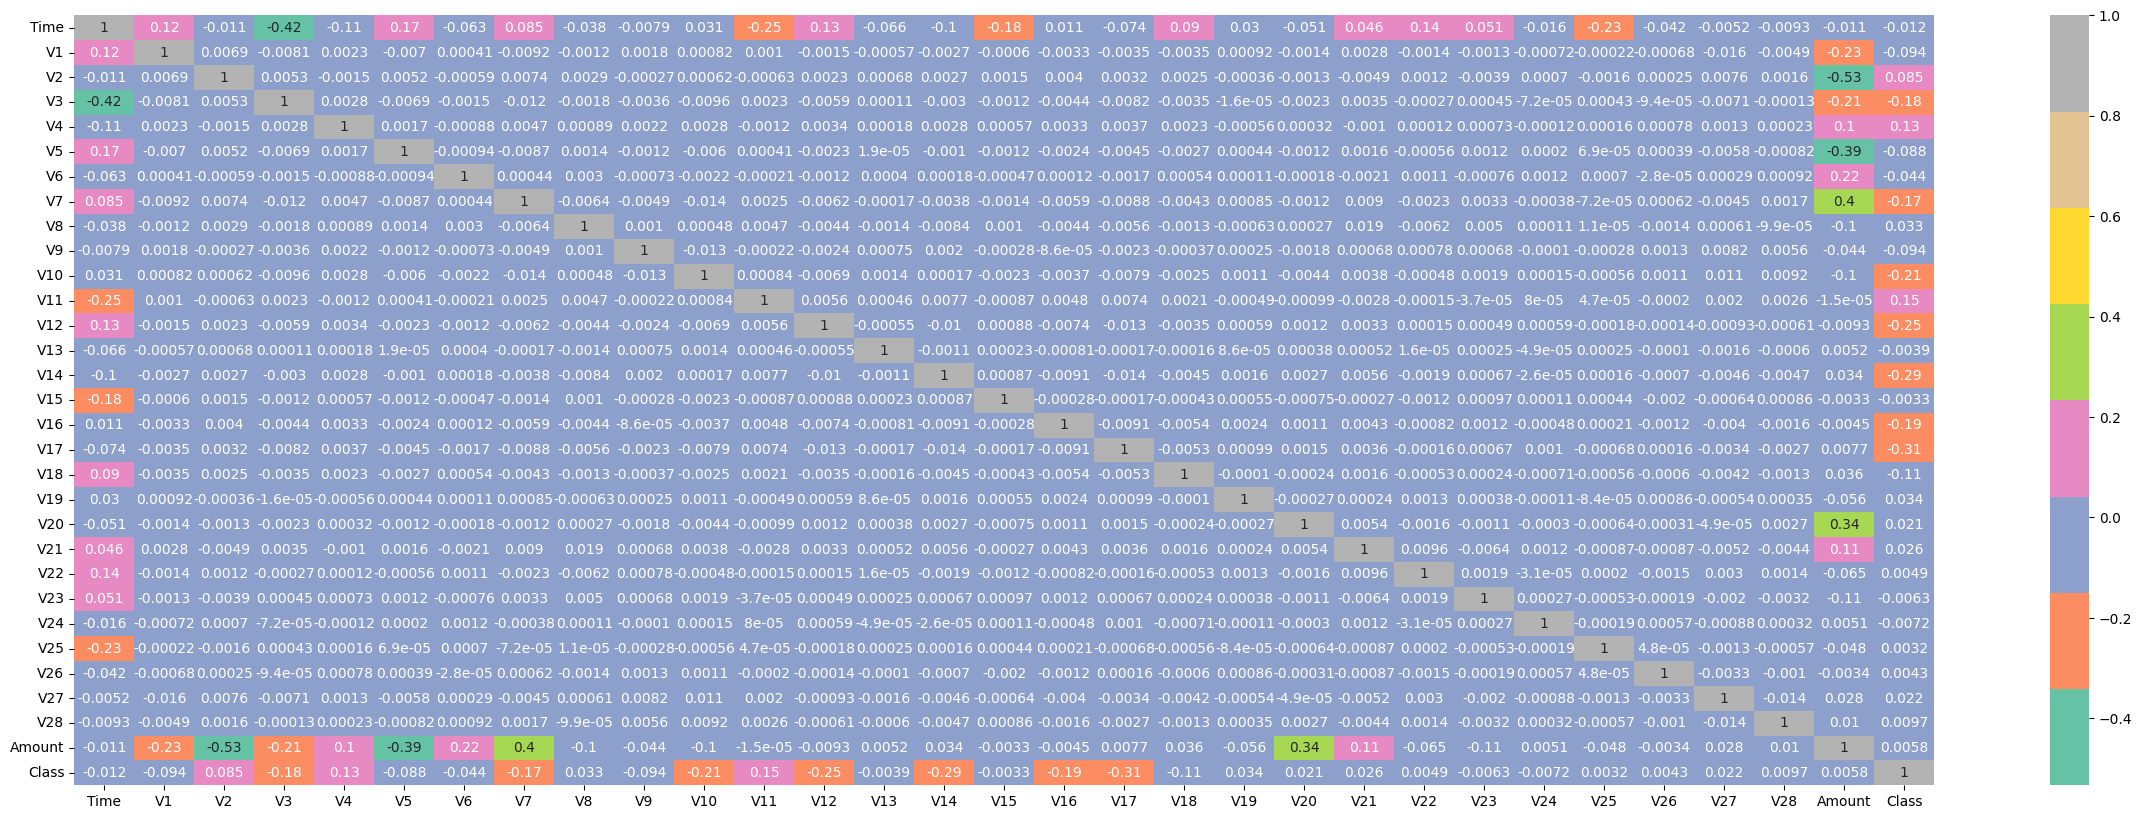

In [ ]:
plt.figure(figsize = (30,10))
sns.heatmap(card.corr(), annot=True, cmap="Set2")
plt.show()

## Feature Scaling

In [ ]:
### save most recent card info before scaling
card_nonscaled = card.copy()
display(card_nonscaled.shape)
display(card_nonscaled.head(3))

(283726, 31)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
### we can see Time and Amounts are two features that are not scaled as the rest of features, so we need to handle that

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler     # handle outlier better

#std_scaler = StandardScaler()
rob_scaler = RobustScaler()

card['scaled_amount'] = rob_scaler.fit_transform(card['Amount'].values.reshape(-1,1))
card['scaled_time'] = rob_scaler.fit_transform(card['Time'].values.reshape(-1,1))

card.drop(['Time','Amount'], axis=1, inplace=True)
card.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279


In [ ]:
### save most recent card info before scaling
card_scaled = card.copy()
display(card_scaled.shape)
display(card_scaled.head(3))

(283726, 31)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279


## Scaled input data now becomes "card_scaled"

### First iteration of modeling aims at initial model accessment and feature selection

get X, y, split training and testing data from the scaled dataset




In [ ]:
X0 = card.drop('Class', axis=1)
y = card['Class']

display(X0.head(3))

features = X0.columns
display(features)
display(len(features))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,-0.995279


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')

30

## Feature Selection (first run on full dataset)
Initial Logistic Regression using Statsmodels to quickly access feature importance and model performance use full dataset

In [ ]:
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')

USING SM (stats model's log regression) instead of Scikit-learn for a quick initial accessment of the model features

In [ ]:
import statsmodels.api as sm

X0 = sm.add_constant(X0)
reg_logit = sm.Logit(y,X0)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003922
         Iterations 13


In [ ]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283695
Method:                           MLE   Df Model:                           30
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.6819
Time:                        18:35:27   Log-Likelihood:                -1112.8
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.6894      0.150    -57.889      0.000      -8.984      -8.395
V1                0.0961      0.042      2.270      0.023       0.013       0.179
V2                0.0106      0.058      0.182      0.855      -0.103       0.125
V3               -0.0083      0.053     -0.157      0.875      -0.112       0.096
V4                0.7013      0.074      9.484      0.000       0.556       0.846
V5                0.1305      0.067      1.952      0.051      -0.001       0.262
V6               -0.1240      0.074     -1.671      0.095      -0.269       0.021
V7               -0.0948      0.067     -1.421      0.155      -0.226       0.036
V8               -0.1766      0.031     -5.769      0.000      -0.237      -0.117
V9               -0.2825      0.111     -2.551      0.011      -0.500      -0.065
V10              -0.8230      0.097     -8.497      0.000      -1.013      -0.633
V11              -0.0579      0.081     -0.711      0.477      -0.217       0.102
V12               0.0831      0.087      0.955      0.339      -0.087       0.254
V13              -0.3257      0.082     -3.986      0.000      -0.486      -0.166
V14              -0.5477      0.062     -8.785      0.000      -0.670      -0.426
V15              -0.1207      0.086     -1.403      0.161      -0.289       0.048
V16              -0.1992      0.125     -1.592      0.111      -0.444       0.046
V17              -0.0139      0.070     -0.198      0.843      -0.151       0.124
V18              -0.0139      0.129     -0.107      0.914      -0.267       0.239
V19               0.0985      0.097      1.015      0.310      -0.092       0.289
V20              -0.4616      0.082     -5.660      0.000      -0.621      -0.302
V21               0.3944      0.060      6.564      0.000       0.277       0.512
V22               0.6377      0.134      4.750      0.000       0.375       0.901
V23              -0.1021      0.059     -1.733      0.083      -0.217       0.013
V24               0.1191      0.148      0.807      0.420      -0.170       0.409
V25              -0.0506      0.133     -0.379      0.704      -0.312       0.211
V26               0.0094      0.190      0.050      0.960      -0.363       0.382
V27              -0.8265      0.122     -6.778      0.000      -1.065      -0.587
V28              -0.2973      0.088     -3.378      0.001      -0.470      -0.125
scaled_amount     0.0664      0.027      2.454      0.014       0.013       0.119
scaled_time      -0.3128      0.192     -1.627      0.104      -0.690       0.064
=================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Feature Selection -- using backward elemination method
Drop insiginificant features one by one in each regression iteration
( p-value < 0.05 )

In [ ]:
def select_features(data_frame, label_var, feature_list):
  """ Runs the logistic regression repeatedly removing feature with the highest
  p value above alpha one at a time and returns the regression summary with
  all p-value below the defined significant levels (alpha)"""

  while len(feature_list) > 0:
    model=sm.Logit(label_var, data_frame[feature_list])
    result=model.fit(disp=0)
    largest_pvalue=round(result.pvalues,3).nlargest(1)
    if largest_pvalue[0]<(0.05):
       return result
       break
    else:
       feature_list=feature_list.drop(largest_pvalue.index)

In [ ]:
## Drop insigificant features after running backward elemination
data_frame = X0     #used all independent variables data, no split yet
label_var = card.Class
feature_list = features

result = select_features(data_frame, label_var, feature_list)
summary =  result.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283696
Method:                           MLE   Df Model:                           29
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  -1.930
Time:                        18:37:42   Log-Likelihood:                -10249.
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
V1                0.1943      0.027      7.138      0.000       0.141       0.248
V2               -7.6145      0.056   -136.483      0.000      -7.724      -7.505
V3               -3.1623      0.025   -125.392      0.000      -3.212      -3.113
V4                1.2196      0.019     65.838      0.000       1.183       1.256
V5               -9.5897      0.067   -142.312      0.000      -9.722      -9.458
V6                5.4968      0.043    128.880      0.000       5.413       5.580
V7               10.7568      0.076    142.048      0.000      10.608      10.905
V8               -0.5063      0.021    -23.998      0.000      -0.548      -0.465
V9               -3.0403      0.035    -86.221      0.000      -3.109      -2.971
V10              -4.9569      0.050    -98.709      0.000      -5.055      -4.859
V11              -0.3247      0.023    -13.959      0.000      -0.370      -0.279
V12              -1.4982      0.026    -56.571      0.000      -1.550      -1.446
V13              -0.3816      0.022    -17.031      0.000      -0.426      -0.338
V14               0.6643      0.025     26.389      0.000       0.615       0.714
V15              -1.2545      0.026    -48.322      0.000      -1.305      -1.204
V16              -2.1354      0.032    -66.827      0.000      -2.198      -2.073
V17              -0.6193      0.026    -23.458      0.000      -0.671      -0.568
V18               2.3153      0.032     72.982      0.000       2.253       2.377
V19              -3.1160      0.038    -82.529      0.000      -3.190      -3.042
V20              24.4814      0.185    132.338      0.000      24.119      24.844
V21               8.1478      0.067    121.070      0.000       8.016       8.280
V22              -2.6374      0.045    -58.809      0.000      -2.725      -2.549
V23               3.0638      0.112     27.478      0.000       2.845       3.282
V24              -1.0247      0.037    -27.446      0.000      -1.098      -0.952
V25              -1.3911      0.058    -23.904      0.000      -1.505      -1.277
V26              -0.9294      0.050    -18.745      0.000      -1.027      -0.832
V27              -7.5744      0.092    -82.098      0.000      -7.755      -7.394
V28               7.6600      0.142     53.795      0.000       7.381       7.939
scaled_amount   -12.5609      0.080   -156.601      0.000     -12.718     -12.404
scaled_time      -0.7022      0.057    -12.247      0.000      -0.815      -0.590
=================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
### convert summary table from the fitted model to pandas data frame
results_df = pd.DataFrame(summary.tables[1].data)
results_df.columns = results_df.iloc[0]
results_df = results_df.drop(0)
display(results_df.head(5))

### get a list of the kept features
kept_features = list(results_df[''])
display(print(kept_features))

display(print("selected feature counts:", len(kept_features)))

,,coef,std err,z,P>|z|,[0.025,0.975]
1,V1,0.1943,0.027,7.138,0.000,0.141,0.248
2,V2,-7.6145,0.056,-136.483,0.000,-7.724,-7.505
3,V3,-3.1623,0.025,-125.392,0.000,-3.212,-3.113
4,V4,1.2196,0.019,65.838,0.000,1.183,1.256
5,V5,-9.5897,0.067,-142.312,0.000,-9.722,-9.458


['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time']


None

selected feature counts: 30


None

# Insights 1:

Now we can see the importance of feature scaling. In a seperate analysis (not included here), when we don't do feature scaling of Time and Amount, there are couple of features are actually insiginficant and being eliminated. But after the scaling, no features are removed.

## Generate a new set of data based on selected features

In [ ]:
### make sure card still maintain the correct shape
display(card_scaled.shape)
display(card.shape)

(283726, 31)

(283726, 31)

In [ ]:
### generate new X and y for 2nd iteration, which is a formal training using sklearn and on full dataset (no down sampling)
X = card[kept_features]
y = card['Class']

X.shape

(283726, 30)

## Using Scikit-Learn ML framework to train models (on full dataset, not down-sampled dataset)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
29031,1.028040,0.000605,1.827002,3.129091,-1.113836,0.413892,-0.665573,0.264259,0.714350,0.253758,-1.258386,0.618756,-0.369979,-0.912880,-2.262223,-0.304176,0.393700,-0.843778,-0.320388,-0.181718,-0.279263,-0.426700,0.064734,0.716834,0.358839,-0.080531,0.057394,0.038398,-0.042275,-0.580628
228014,1.995130,0.112358,-1.608313,0.338091,0.452884,-0.559138,0.115485,-0.104591,0.146493,-0.236075,1.423345,1.171192,0.428649,-0.725648,-0.512832,0.380659,0.316638,-0.016991,0.197377,-0.109246,-0.284774,-0.740514,0.343097,0.623906,-0.313782,0.145760,-0.061507,-0.036911,-0.167014,0.712471
208025,-1.149643,1.304833,0.928057,-0.431527,0.297815,-0.551020,0.849476,0.246270,-0.941554,-0.974635,0.924477,1.605869,1.081947,0.453140,-0.909460,-0.479004,-0.158465,-0.128496,1.004086,-0.070979,-0.107010,-0.376968,-0.299559,0.097597,0.694817,-0.373437,-0.216605,-0.023688,-0.030177,0.614026
213808,-0.475978,1.295079,-0.771354,-1.135001,1.193496,-1.773013,2.006649,-0.774641,-0.002023,0.323862,-0.606685,0.288130,0.588219,0.195883,-0.207062,-0.825698,-0.572165,-0.554844,-0.199690,0.299516,0.139083,0.979610,-0.256990,0.119326,-0.194859,0.063975,0.444008,0.209819,0.041719,0.642912
156263,-1.247290,0.178527,1.916522,-0.432584,1.196505,1.612433,0.062291,0.300123,1.580567,-0.834084,1.916198,-2.295256,0.890620,1.556144,0.844836,-0.729526,0.656788,-0.028376,0.054561,-0.173014,-0.236266,-0.123861,0.109693,-1.765920,0.161812,-0.623279,-0.301285,-0.116148,-0.276039,0.270298


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## **Model Evaluation**

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
#y_pred = classifier.predict(X_test)

# Overfitting Case
print('---' * 45)
print('Standard evaluation matrix:\n')
print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.3f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Standard evaluation matrix:

Recall Score: 0.593
Precision Score: 0.843
F1 Score: 0.697
Accuracy Score: 0.999
---------------------------------------------------------------------------------------------------------------------------------------


**Confusion Matrix**

<Figure size 200x200 with 0 Axes>

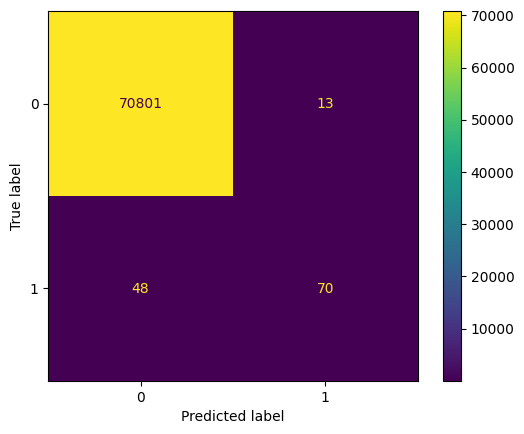

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0',"Acutual:1"])

## plot confusion matrix using sklearn library
plt.figure(figsize=(2,2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

## Evaluate the model with additional matrics and details

In [ ]:
### print more details

TP=cm[1,1]     # TP: predicted fraud is true fraud
TN=cm[0,0]     # TN: predicted non-fraud is true no-fraud
FP=cm[0,1]     # FP: predicted fraud is false
FN=cm[1,0]     # FN: predicted non-fraud is fraud
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
precision = TP/float(TP+FP)
recall = sensitivity     # TP: predicted fraud is true fraud
F1 = 2*(precision*recall)/(precision+recall)
print(' The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round( (TP+TN)/float(TP+TN+FP+FN),3),'\n',
'The Missclassification = 1-Accuracy = ', round( 1-((TP+TN)/float(TP+TN+FP+FN)),4),'\n',
'Sensitivity (Recall) or True Positive Rate = TP/(TP+FN) = ', round( TP/float(TP+FN),3),'\n',
'Precision = TP/TP+FP =', round( TP / float(TP+FP),3),'\n',
'F1 score = 2 * (Precision*Recall)/(Precision+Recall) = ', round(F1, 3),'\n\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ', round( TN/float(TN+FP),3),'\n',
'Positive Predictive value = TP/(TP+FP) = ', round( TP/float(TP+FP),3),'\n',
'Negative Predictive Value = TN/(TN+FN) = ', round(  TN/float(TN+FN),3),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',round( sensitivity/(1-specificity),3),'\n',
'Negative Likelihood Ratio = (1-Sensitivity)/Specificity = ', round((1-sensitivity)/specificity,3),)

 The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.999 
 The Missclassification = 1-Accuracy =  0.0009 
 Sensitivity (Recall) or True Positive Rate = TP/(TP+FN) =  0.593 
 Precision = TP/TP+FP = 0.843 
 F1 score = 2 * (Precision*Recall)/(Precision+Recall) =  0.697 

 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  0.843 
 Negative Predictive Value = TN/(TN+FN) =  0.999 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3231.408 
 Negative Likelihood Ratio = (1-Sensitivity)/Specificity =  0.407


# Insight 2:

We notice there are some performance issues: recall is pretty low
(0.593) compared to precision(0.843),  which means, this problem is higher specificity but lower sensitive, doesn't detect all True positive(Fraud cases). As a result, the overall F1 score is not so good (0.697)

-- Positive Likelihood Ratio = sensitivity / ( 1-Specificity)

-- Negative Likelihood Ratio = (1 - Sensitivity) / Specificity.

This means we are good at predicting what is not-fraud, but not good at detecting fraud cases. This might be due to the high imbalance found in the dataset. So as a follow-up steps, we can try down-sampling to keep the fraud and non-fraud sample size in a similar range.

## Turning classification threshold

The first thing we can try is to adjust the classification threshold

Predicted Probabilities of 0 (no Fraud) and 1 (Fraud) for the test data with a default classification threshold of 0.5

Lower the threshold: since the model is predicting Fraud too many typeII errors is not advisable. Too many false negative here is more dangerous than a false positive in this case. Hense we want to lower the threshold to increase sensitivity.

In [ ]:
y_pred_prob = classifier.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of no fraud(0)','Prob of fraud (1)'])
y_pred_prob_df.head()

,Prob of no fraud(0),Prob of fraud (1)
0,1.0,1.541e-05
1,1.0,2.146e-04
2,1.0,4.866e-04
3,1.0,2.285e-04
4,1.0,9.030e-05


Sparse matrix is comprised of mostly zero values, and they are distinct from so called dense matrices which comprise mostly non-zero values. Spare matrices are special because, to save space in memory, the zeros aren’t stored.

We can use Scikit-learn preprocessing.binarize() function to binarize the sparse matrices thus generated desired labels

In [ ]:
import numpy as np
from sklearn import preprocessing

def tuning_threshold(X_test):
    for i in range(1,10):
        cm2=0
        curr_thresh = i/20
        probs=classifier.predict_proba(X_test)
        y_pred2=preprocessing.binarize(probs, threshold=curr_thresh)
        y_pred2=y_pred2[:,1]
        cm2=confusion_matrix(y_test,y_pred2)

        TP=cm2[1,1]     # TP: predicted fraud is true fraud
        TN=cm2[0,0]     # TN: predicted non-fraud is true no-fraud
        FP=cm2[0,1]     # FP: predicted fraud is false
        FN=cm2[1,0]     # FN: predicted non-fraud is fraud
        sensitivity = TP/float(TP+FN)
        specificity = TN/float(TN+FP)
        precision = TP/float(TP+FP)
        recall = sensitivity     # TP: predicted fraud is true fraud
        F1 = 2*(precision*recall)/(precision+recall)

        print ('Test threshold:',curr_thresh,', resulting Confusion Matrix ','\n',cm2,'\n',
              'Precision:',round(precision,3), '; Recall:', round(recall,3), '; F1 score:', round(F1,4),'\n',
                'Correct predictions: ', round(TN+TP,3),' ; ', round(FN,3),'Type II errors( False Negatives)','\n',
              'Sensitivity: ', round(sensitivity,3),' ; Specificity: ',round(specificity,5),'\n\n\n')

In [ ]:
tuning_threshold(X_test)

Test threshold: 0.05 , resulting Confusion Matrix  
 [[70786    28]
 [   26    92]] 
 Precision: 0.767 ; Recall: 0.78 ; F1 score: 0.7731 
 Correct predictions:  70878  ;  26 Type II errors( False Negatives) 
 Sensitivity:  0.78  ; Specificity:  0.9996 



Test threshold: 0.1 , resulting Confusion Matrix  
 [[70792    22]
 [   29    89]] 
 Precision: 0.802 ; Recall: 0.754 ; F1 score: 0.7773 
 Correct predictions:  70881  ;  29 Type II errors( False Negatives) 
 Sensitivity:  0.754  ; Specificity:  0.99969 



Test threshold: 0.15 , resulting Confusion Matrix  
 [[70796    18]
 [   33    85]] 
 Precision: 0.825 ; Recall: 0.72 ; F1 score: 0.7692 
 Correct predictions:  70881  ;  33 Type II errors( False Negatives) 
 Sensitivity:  0.72  ; Specificity:  0.99975 



Test threshold: 0.2 , resulting Confusion Matrix  
 [[70796    18]
 [   35    83]] 
 Precision: 0.822 ; Recall: 0.703 ; F1 score: 0.758 
 Correct predictions:  70879  ;  35 Type II errors( False Negatives) 
 Sensitivity:  0.703  

## Insight 3: Classification Threshold Determination

It seems the optimal threshold for this problem is 0.1, and next choice 0.05. This claim is based on overall F1 score

## Model performance Comparison with different thresholds:

Default threshold = 0.5
optimal threshold = 0.1

In [ ]:
# Evaluation metrics for default threshold 0.5
print("Evaluation metrics with threshold 0.5:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Evaluation metrics with threshold 0.5:
Accuracy: 0.9991400214289742
Precision: 0.8433734939759037
Recall: 0.5932203389830508
F1 score: 0.6965174129353234


In [ ]:
# Evaluation metrics for new threshold
threshold = 0.1
y_pred_new_threshold = (classifier.predict_proba(X_test)[:, 1] >= threshold).astype(int)

print("Evaluation metrics with threshold 0.1:")
print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold))
print("Precision:", precision_score(y_test, y_pred_new_threshold))
print("Recall:", recall_score(y_test, y_pred_new_threshold))
print("F1 score:", f1_score(y_test, y_pred_new_threshold))

Evaluation metrics with threshold 0.1:
Accuracy: 0.999281001522585
Precision: 0.8018018018018018
Recall: 0.7542372881355932
F1 score: 0.777292576419214


## ROC Curve

In [ ]:
def logistic_roc_curve(fpr, tpr, classifier='Logistic Regression'):
    plt.figure(figsize=(6,4))
    plt.title(classifier + ' ROC Curve', fontsize=16)
    plt.plot(fpr, tpr, 'b-', linewidth=1.5)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    plt.annotate('Minimum ROC Score\n of 50%', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )

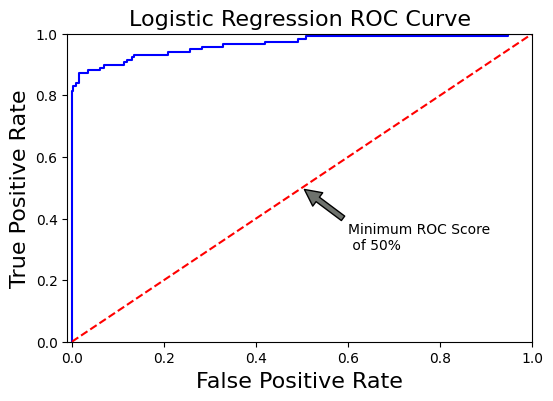

In [ ]:
from sklearn.metrics import roc_curve

### use default threshold 0.5
binary_predictions=classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, binary_predictions[:,1])

###plot ROC curve
logistic_roc_curve(fpr, tpr,'Logistic Regression')
plt.show()

prediction with threshold : 0.1
[0 0 0 ... 0 0 0]
Area Under the ROC Curve for threshold: 0.1 0.8769633075524184


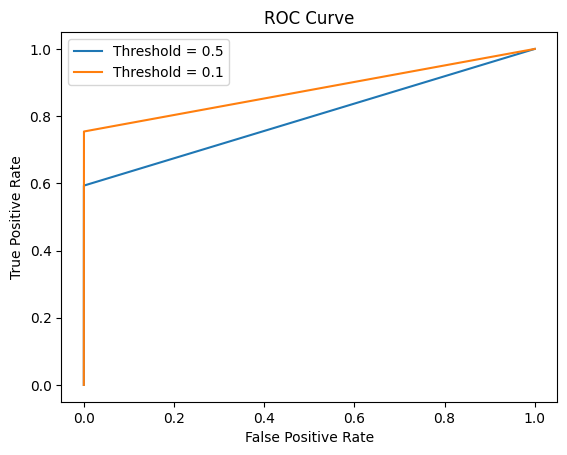

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')

# changing threshold
threshold = 0.1
print('prediction with threshold :', threshold)
y_pred_new_threshold = (classifier.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(y_pred_new_threshold)

fpr_, tpr_, thresholds_= roc_curve(y_test, y_pred_new_threshold )
print('Area Under the ROC Curve for threshold:', threshold, roc_auc_score(y_test, y_pred_new_threshold))
plt.plot(fpr_, tpr_, label = 'Threshold = 0.1')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# AUC

### Calculate AUC using default threshold 0.5

In [ ]:
from sklearn.metrics import roc_auc_score

### print AUC for default 0.5 threshold
print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_pred))



Area Under the ROC Curve for threshold 0.5: 0.7965183797324382


### Calculate AUC using the optimal threshold 0.1

In [ ]:
### calculate AUC using new threshold 0.1
print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_pred_new_threshold))

Area Under the ROC Curve for threshold 0.5: 0.8769633075524184


## Save processed scaled input data

In [ ]:
card_scaled.shape

(283726, 31)

In [ ]:
card_scaled.to_csv("/content/drive/My Drive/Colab Notebooks/creditcard_scaled.csv")


## Save and load models or  splitted training/testing data

In [ ]:
import pickle

pickle.dump(classifier , open('/content/drive/My Drive/Colab Notebooks/logisticRegressionModel.pk1' , 'wb'))

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/logisticRegressionModel.pk1' , 'rb'))
#loaded_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

### Save and load Training and Testing data that are used to train Logistic Regression in this notebook

In [ ]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(212794, 30)

(212794,)

(70932, 30)

(70932,)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train results:\n================================================")
        print(f"Accuracy: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Performance:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Results:\n================================================")
        print(f"Accuracy: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Performance:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

#Use Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


Train results:
Accuracy: 100.00%
_______________________________________________
Classification Performance:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    212439.0  355.0       1.0   212794.0      212794.0
_______________________________________________
Confusion Matrix: 
 [[212439      0]
 [     0    355]]

Test Results:
Accuracy: 99.95%
_______________________________________________
Classification Performance:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0    0.947       1.0      0.973         1.000
recall         1.0    0.754       1.0      0.877         1.000
f1-score       1.0    0.840       1.0      0.920         0.999
support    70814.0  118.000       1.0  70932.000     70932.000
_______________________________________________
Confusi

In [ ]:
#initialize a dictionary to store the F1 score for various models

f1_score_metrics = dict()

In [ ]:
f1_score_metrics['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

f1_score_metrics

{'Random Forest': {'Train': 1.0, 'Test': 0.8396226415094339}}

# Use XGBoost Model

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


Train results:
Accuracy: 100.00%
_______________________________________________
Classification Performance:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    212439.0  355.0       1.0   212794.0      212794.0
_______________________________________________
Confusion Matrix: 
 [[212439      0]
 [     0    355]]

Test Results:
Accuracy: 99.95%
_______________________________________________
Classification Performance:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0    0.956       1.0      0.978         0.999
recall         1.0    0.737       1.0      0.869         1.000
f1-score       1.0    0.833       1.0      0.916         0.999
support    70814.0  118.000       1.0  70932.000     70932.000
_______________________________________________
Confusi

In [ ]:
f1_score_metrics['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

f1_score_metrics

{'Random Forest': {'Train': 1.0, 'Test': 0.8396226415094339},
 'XGBoost': {'Train': 1.0, 'Test': 0.8325358851674641}}

## Re-run Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_clf = LogisticRegression()
logit_clf.fit(X_train, y_train)

y_train_pred = logit_clf.predict(X_train)
y_test_pred = logit_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


Train results:
Accuracy: 99.93%
_______________________________________________
Classification Performance:
                    0        1  accuracy   macro avg  weighted avg
precision       0.999    0.883     0.999       0.941         0.999
recall          1.000    0.637     0.999       0.818         0.999
f1-score        1.000    0.740     0.999       0.870         0.999
support    212439.000  355.000     0.999  212794.000    212794.000
_______________________________________________
Confusion Matrix: 
 [[212409     30]
 [   129    226]]

Test Results:
Accuracy: 99.91%
_______________________________________________
Classification Performance:
                   0        1  accuracy  macro avg  weighted avg
precision      0.999    0.843     0.999      0.921         0.999
recall         1.000    0.593     0.999      0.797         0.999
f1-score       1.000    0.697     0.999      0.848         0.999
support    70814.000  118.000     0.999  70932.000     70932.000
_____________________

In [ ]:

f1_score_metrics['LogisticRegression'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

f1_score_metrics

{'Random Forest': {'Train': 1.0, 'Test': 0.8396226415094339},
 'XGBoost': {'Train': 1.0, 'Test': 0.8325358851674641},
 'LogisticRegression': {'Train': 0.739770867430442,
  'Test': 0.6965174129353234}}

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf') # Radial Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

### generate score for train and test
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train results:
Accuracy: 99.96%
_______________________________________________
Classification Performance:
                  0        1  accuracy   macro avg  weighted avg
precision       1.0    0.976       1.0       0.988           1.0
recall          1.0    0.806       1.0       0.903           1.0
f1-score        1.0    0.883       1.0       0.941           1.0
support    212439.0  355.000       1.0  212794.000      212794.0
_______________________________________________
Confusion Matrix: 
 [[212432      7]
 [    69    286]]

Test Results:
Accuracy: 99.93%
_______________________________________________
Classification Performance:
                   0        1  accuracy  macro avg  weighted avg
precision      0.999    0.961     0.999      0.980         0.999
recall         1.000    0.627     0.999      0.814         0.999
f1-score       1.000    0.759     0.999      0.879         0.999
support    70814.000  118.000     0.999  70932.000     70932.000
_______________________________

In [ ]:

f1_score_metrics['SVM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

f1_score_metrics

{'Random Forest': {'Train': 1.0, 'Test': 0.8396226415094339},
 'XGBoost': {'Train': 1.0, 'Test': 0.8325358851674641},
 'LogisticRegression': {'Train': 0.739770867430442,
  'Test': 0.6965174129353234},
 'SVM': {'Train': 0.882716049382716, 'Test': 0.758974358974359}}

## CatBoost

In [ ]:
#!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


Learning rate set to 0.101618
0:	learn: 0.3994821	total: 53.2ms	remaining: 53.1s
1:	learn: 0.2136633	total: 108ms	remaining: 53.8s
2:	learn: 0.1158719	total: 163ms	remaining: 54s
3:	learn: 0.0655593	total: 230ms	remaining: 57.2s
4:	learn: 0.0394368	total: 331ms	remaining: 1m 5s
5:	learn: 0.0251592	total: 442ms	remaining: 1m 13s
6:	learn: 0.0161389	total: 541ms	remaining: 1m 16s
7:	learn: 0.0111822	total: 650ms	remaining: 1m 20s
8:	learn: 0.0084309	total: 746ms	remaining: 1m 22s
9:	learn: 0.0065915	total: 842ms	remaining: 1m 23s
10:	learn: 0.0053364	total: 954ms	remaining: 1m 25s
11:	learn: 0.0045439	total: 1.07s	remaining: 1m 27s
12:	learn: 0.0039692	total: 1.19s	remaining: 1m 30s
13:	learn: 0.0035826	total: 1.29s	remaining: 1m 31s
14:	learn: 0.0032515	total: 1.41s	remaining: 1m 32s
15:	learn: 0.0030158	total: 1.51s	remaining: 1m 33s
16:	learn: 0.0028665	total: 1.63s	remaining: 1m 34s
17:	learn: 0.0027524	total: 1.74s	remaining: 1m 34s
18:	learn: 0.0026438	total: 1.86s	remaining: 1m 36

In [ ]:

f1_score_metrics['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

f1_score_metrics

{'Random Forest': {'Train': 1.0, 'Test': 0.8396226415094339},
 'XGBoost': {'Train': 1.0, 'Test': 0.8325358851674641},
 'LogisticRegression': {'Train': 0.739770867430442,
  'Test': 0.6965174129353234},
 'SVM': {'Train': 0.882716049382716, 'Test': 0.758974358974359},
 'CatBoost': {'Train': 1.0, 'Test': 0.8380952380952381}}

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_clf.fit(X_train, y_train)

y_train_pred = gb_clf.predict(X_train)
y_test_pred = gb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train results:
Accuracy: 99.94%
_______________________________________________
Classification Performance:
                  0        1  accuracy   macro avg  weighted avg
precision       1.0    0.839     0.999       0.919         0.999
recall          1.0    0.808     0.999       0.904         0.999
f1-score        1.0    0.824     0.999       0.912         0.999
support    212439.0  355.000     0.999  212794.000    212794.000
_______________________________________________
Confusion Matrix: 
 [[212384     55]
 [    68    287]]

Test Results:
Accuracy: 99.93%
_______________________________________________
Classification Performance:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0    0.827     0.999      0.913         0.999
recall         1.0    0.729     0.999      0.864         0.999
f1-score       1.0    0.775     0.999      0.887         0.999
support    70814.0  118.000     0.999  70932.000     70932.000
_________________________________________

In [ ]:

f1_score_metrics['GradientBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

f1_score_metrics

{'Random Forest': {'Train': 1.0, 'Test': 0.8396226415094339},
 'XGBoost': {'Train': 1.0, 'Test': 0.8325358851674641},
 'LogisticRegression': {'Train': 0.739770867430442,
  'Test': 0.6965174129353234},
 'SVM': {'Train': 0.882716049382716, 'Test': 0.758974358974359},
 'CatBoost': {'Train': 1.0, 'Test': 0.8380952380952381},
 'GradientBoost': {'Train': 0.8235294117647058, 'Test': 0.7747747747747747}}

## Machine Learning Models Performance Comparison

In [ ]:
f1_score_metrics

{'Random Forest': {'Train': 1.0, 'Test': 0.8396226415094339},
 'XGBoost': {'Train': 1.0, 'Test': 0.8325358851674641},
 'LogisticRegression': {'Train': 0.739770867430442,
  'Test': 0.6965174129353234},
 'SVM': {'Train': 0.882716049382716, 'Test': 0.758974358974359},
 'CatBoost': {'Train': 1.0, 'Test': 0.8380952380952381},
 'GradientBoost': {'Train': 0.8235294117647058, 'Test': 0.7747747747747747}}

<Axes: >

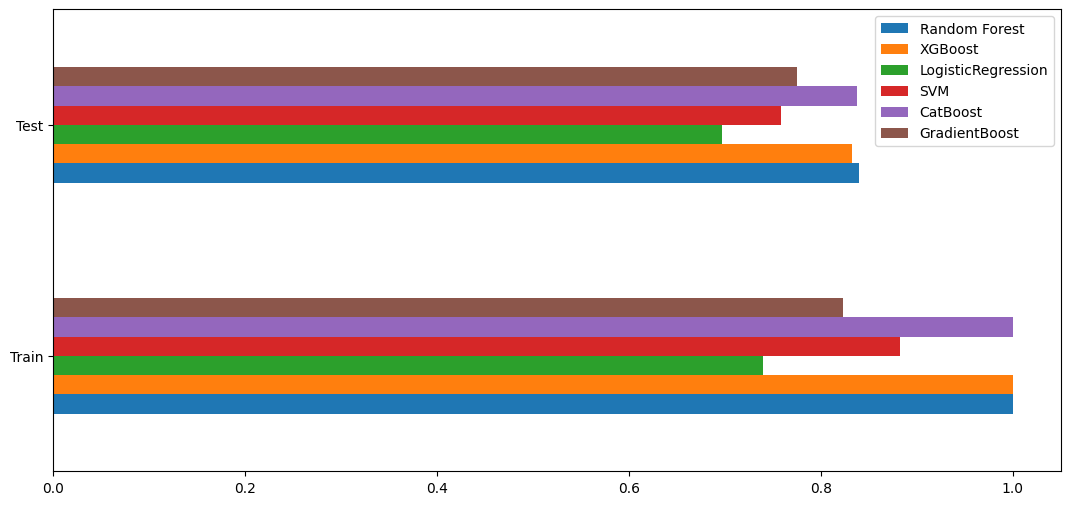

In [ ]:
f1_df = pd.DataFrame(f1_score_metrics)
f1_df.plot(kind='barh', figsize=(13,6))


Save the F1 performance data

In [ ]:
pickle.dump(f1_score_metrics , open('/content/drive/My Drive/Colab Notebooks/f1_score_metrics.pk1' , 'wb'))

## Train models using Artificial Neural Network (ANNs)

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [ ]:
model_metrics = [
    keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]


In [ ]:
X_train_v, X_validate, y_train_v, y_validate = train_test_split(X_train, y_train,
                                                            test_size=0.12, random_state=66)


w_nofraud = y_train_v.value_counts()[0] / len(y_train_v)
w_fraud = y_train_v.value_counts()[1] / len(y_train_v)


display(w_nofraud)
display(w_fraud)

0.9983124886520202

0.0016875113479797926

In [ ]:
print(f"TRAINING: X_train: {X_train_v.shape}, y_train: {y_train_v.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (187258, 30), y_train: (187258,)
_______________________________________________________
VALIDATION: X_validate: (25536, 30), y_validate: (25536,)
__________________________________________________
TESTING: X_test: (70932, 30), y_test: (70932,)


In [ ]:

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=model_metrics)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_nofraud, 1:w_fraud}

r = model.fit(
    X_train_v, y_train_v,
    validation_data=(X_validate, y_validate),
    batch_size=2048,
    epochs=150,
    class_weight=class_weight,
    callbacks=callbacks
)

Epoch 1/150
92/92 [==============================] - 11s 92ms/step - loss: 0.0010 - accuracy: 4.6606e-04 - fn: 196.0000 - fp: 10.0000 - tn: 199200.0000 - tp: 140.0000 - precision: 0.9333 - recall: 0.4167 - val_loss: 0.0057 - val_accuracy: 2.3496e-04 - val_fn: 27.0000 - val_fp: 1.0000 - val_tn: 25496.0000 - val_tp: 12.0000 - val_precision: 0.9231 - val_recall: 0.3077
Epoch 2/150
92/92 [==============================] - 9s 95ms/step - loss: 6.4711e-04 - accuracy: 4.9130e-04 - fn: 274.0000 - fp: 7.0000 - tn: 186935.0000 - tp: 42.0000 - precision: 0.8571 - recall: 0.1329 - val_loss: 0.0102 - val_accuracy: 5.0909e-04 - val_fn: 37.0000 - val_fp: 0.0000e+00 - val_tn: 25497.0000 - val_tp: 2.0000 - val_precision: 1.0000 - val_recall: 0.0513
Epoch 3/150
92/92 [==============================] - 7s 76ms/step - loss: 5.4984e-04 - accuracy: 5.7140e-04 - fn: 285.0000 - fp: 5.0000 - tn: 186937.0000 - tp: 31.0000 - precision: 0.8611 - recall: 0.0981 - val_loss: 0.0130 - val_accuracy: 7.0489e-04 - val_f

In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

2217/2217 [==============================] - 8s 4ms/step - loss: 0.0113 - accuracy: 0.0023 - fn: 82.0000 - fp: 0.0000e+00 - tn: 70814.0000 - tp: 36.0000 - precision: 1.0000 - recall: 0.3051
[0.011321425437927246, 0.0022979755885899067, 82.0, 0.0, 70814.0, 36.0, 1.0, 0.3050847351551056]


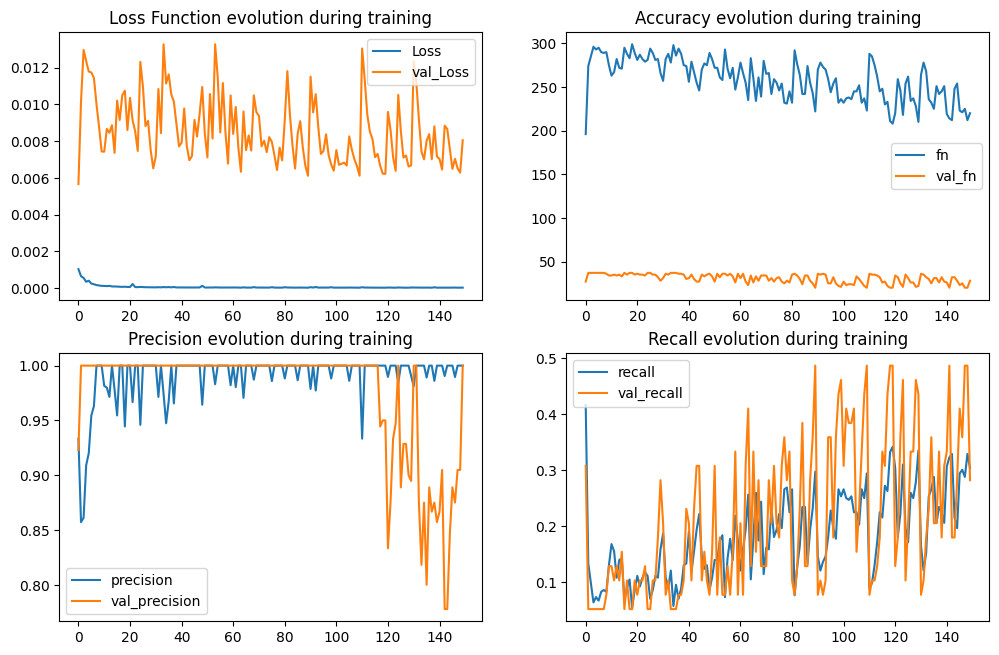

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

## Insight 4:
 The loss function evolution indicates the model doesn't do much. The class weight given to the model in the beginning is too skewed. Let's remove it and rerun

In [ ]:

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=model_metrics)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_nofraud, 1:w_fraud}

r1 = model.fit(
    X_train_v, y_train_v,
    validation_data=(X_validate, y_validate),
    batch_size=2048,
    epochs=150,
    #class_weight=class_weight,
    callbacks=callbacks
)

Epoch 1/150
92/92 [==============================] - 27s 268ms/step - loss: 0.0066 - accuracy: 0.0026 - fn: 212.0000 - fp: 15.0000 - tn: 257741.0000 - tp: 222.0000 - precision: 0.9367 - recall: 0.5115 - val_loss: 0.0038 - val_accuracy: 0.0027 - val_fn: 11.0000 - val_fp: 3.0000 - val_tn: 25494.0000 - val_tp: 28.0000 - val_precision: 0.9032 - val_recall: 0.7179
Epoch 2/150
92/92 [==============================] - 9s 97ms/step - loss: 0.0052 - accuracy: 0.0027 - fn: 91.0000 - fp: 33.0000 - tn: 186909.0000 - tp: 225.0000 - precision: 0.8721 - recall: 0.7120 - val_loss: 0.0034 - val_accuracy: 0.0023 - val_fn: 10.0000 - val_fp: 3.0000 - val_tn: 25494.0000 - val_tp: 29.0000 - val_precision: 0.9062 - val_recall: 0.7436
Epoch 3/150
92/92 [==============================] - 7s 81ms/step - loss: 0.0043 - accuracy: 0.0027 - fn: 95.0000 - fp: 32.0000 - tn: 186910.0000 - tp: 221.0000 - precision: 0.8735 - recall: 0.6994 - val_loss: 0.0032 - val_accuracy: 0.0020 - val_fn: 9.0000 - val_fp: 4.0000 - val

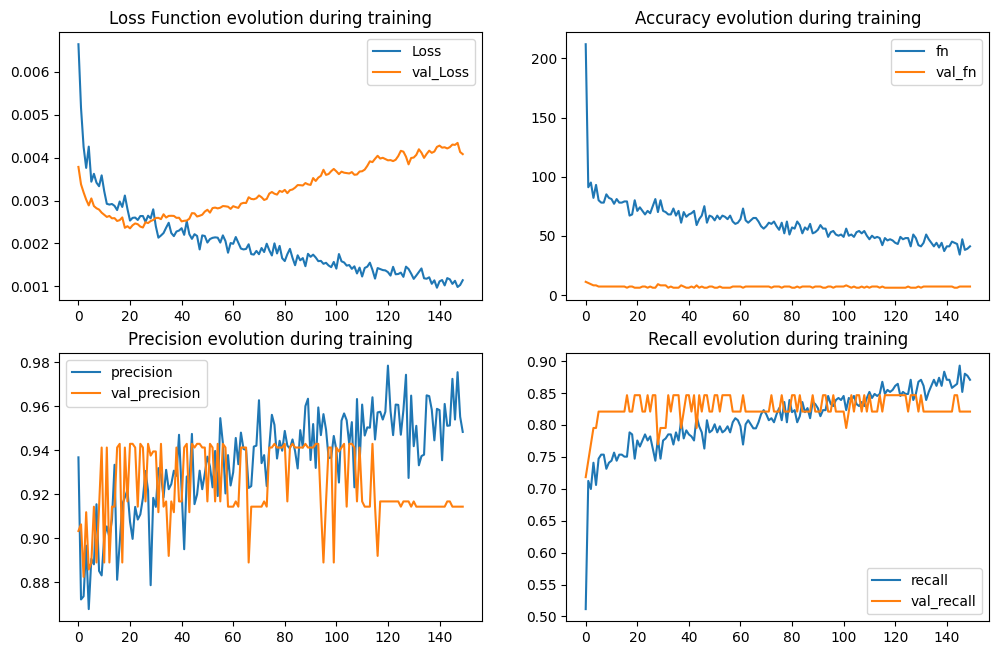

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r1.history['loss'], label='Loss')
plt.plot(r1.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r1.history['fn'], label='fn')
plt.plot(r1.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r1.history['precision'], label='precision')
plt.plot(r1.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r1.history['recall'], label='recall')
plt.plot(r1.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

## Insight 5:
This time the loss function shows descending trends, and precision and recall all shows ascending trends with more epoch iterations. I would suggest to increase the number of epoch to 200-300 because the curve doesn't flatten yet, still have rooms for improvement

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)



2217/2217 [==============================] - 5s 2ms/step
Train results:
Accuracy: 99.98%
_______________________________________________
Classification Performance:
                  0        1  accuracy   macro avg  weighted avg
precision       1.0    0.985       1.0       0.992           1.0
recall          1.0    0.913       1.0       0.956           1.0
f1-score        1.0    0.947       1.0       0.974           1.0
support    212439.0  355.000       1.0  212794.000      212794.0
_______________________________________________
Confusion Matrix: 
 [[212434      5]
 [    31    324]]

Test Results:
Accuracy: 99.95%
_______________________________________________
Classification Performance:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0    0.908     0.999      0.954         0.999
recall         1.0    0.754     0.999      0.877         0.999
f1-score       1.0    0.824     0.999      0.912         0.999
support    70814.0  118.000     0.999  70932.00

In [ ]:
f1_score_metrics['ANNs'] = {
        'Train': f1_score(y_train,y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
}

f1_score_metrics

{'Random Forest': {'Train': 1.0, 'Test': 0.8396226415094339},
 'XGBoost': {'Train': 1.0, 'Test': 0.8325358851674641},
 'LogisticRegression': {'Train': 0.739770867430442,
  'Test': 0.6965174129353234},
 'SVM': {'Train': 0.882716049382716, 'Test': 0.758974358974359},
 'CatBoost': {'Train': 1.0, 'Test': 0.8380952380952381},
 'GradientBoost': {'Train': 0.8235294117647058, 'Test': 0.7747747747747747},
 'ANNs': {'Train': 0.9473684210526315, 'Test': 0.8240740740740741}}

In [ ]:
### let's check the F1 score for various models
f1_score_metrics

{'Random Forest': {'Train': 1.0, 'Test': 0.8396226415094339},
 'XGBoost': {'Train': 1.0, 'Test': 0.8325358851674641},
 'LogisticRegression': {'Train': 0.739770867430442,
  'Test': 0.6965174129353234},
 'SVM': {'Train': 0.882716049382716, 'Test': 0.758974358974359},
 'CatBoost': {'Train': 1.0, 'Test': 0.8380952380952381},
 'GradientBoost': {'Train': 0.8235294117647058, 'Test': 0.7747747747747747},
 'ANNs': {'Train': 0.9473684210526315, 'Test': 0.8240740740740741}}

<Axes: >

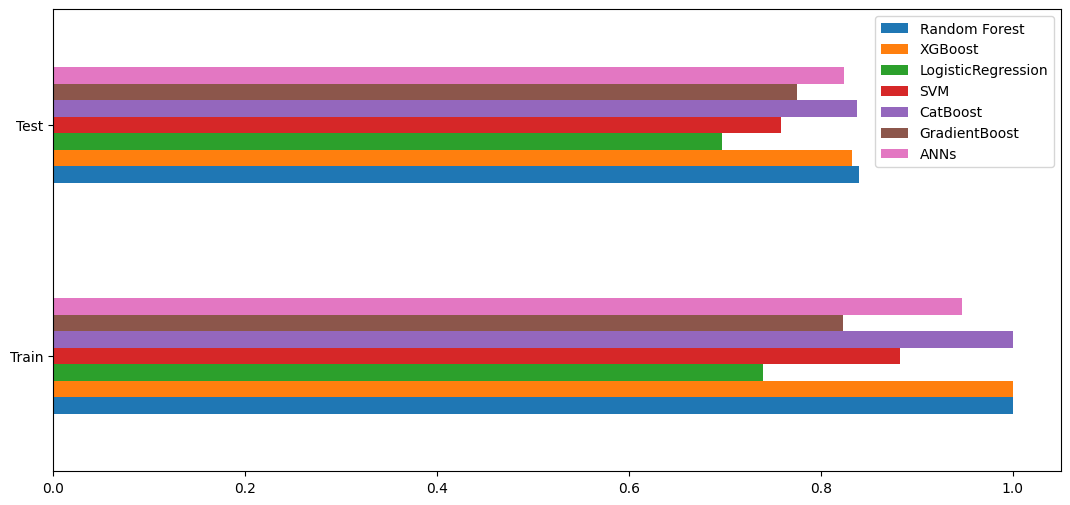

In [ ]:
f2_df = pd.DataFrame(f1_score_metrics)
f2_df.plot(kind='barh', figsize=(13,6))

## Insight 6:

Based on F1 score, we identified a few patterns here:
1. All models perform better on training set than testing set, which is expected
2. The top performing classifiers for this dataset are CatBoost, Random Forest , XGBoost and ANNs. They are the models left when applying F1 score cutoff>=0.8. ANNs's performance seems slightly lower than the other three, but could be due to insufficient hyperparameter turning and insufficient epoch runs.
3. We used CatBoost, Random Forest and XGBoost out of box without adjusting any parameters, they all achieved F1 score in [0.8-0.9] range.
4. The rest of algorithms tested here: Logistic Regression, Gradient Boost and SVM achieved F1 score in [0.7-0.8] range